# Linearna regresija


## Odabir koeficijenta koristeci formulu

Koeficijenti linearne regresije se mogu odabrati koristeci sledecu formulu:

$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_model(model):
    return 'f(height) = {0} + {1}*height'.format(model[0], model[1])

In [3]:
height=np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight=np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

# Analiticko resenje za odabir koeficijenata 'w'.
# w = inverse(X.transpose()*X)*X.transpose()*Y

# Broj instanci u skupu podataka
N = height.shape[0]

# Matrici X dodajemo kolonu jedinica kao prvu kolonu.
# U stvari, napravili smo matricu jedinica pa smo kolonu na indeksu 1
# zamenili sa vektorom podataka (u nasem slucaju visina).
X = np.ones((N, 2))
X[:, 1] = height
y = weight
print('X.shape: {}'.format(X.shape))
print('y.shape: {}'.format(y.shape))

w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(show_model(w))

X.shape: (10, 2)
y.shape: (10,)
f(height) = -0.47266514806388216 + 10.193621867881546*height


Dobijena funkcija u stvari predstavlja jednacinu prave koju mozemo vizuelizovati.

In [4]:
x1 = height[0]
x2 = height[-1]
y1 = w[0] + w[1] * x1
y2 = w[0] + w[1] * x2
print(f'x1 = {x1}\nx2 = {x2}')
print(f'f({x1}) = {y1}\nf({x2}) = {y2}')

x1 = 4.0
x2 = 6.8
f(4.0) = 40.301822323462304
f(6.8) = 68.84396355353063


Text(0.5, 1.0, 'Ilustracija linearne regresije')

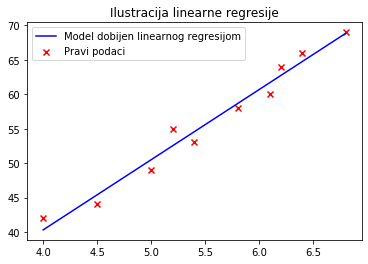

In [5]:
plt.scatter(height, weight, color='red', marker='x')
plt.plot([x1, x2], [y1, y2], color='blue')
plt.legend(['Model dobijen linearnog regresijom', 'Pravi podaci'])
plt.title('Ilustracija linearne regresije')

## Odabir koeficijenata koristeci biliboteku `scikit-learn`.
Biblioteka [scikit-learn](https://scikit-learn.org/) predstavlja jednu od popularnijih
biblioteka za masinsko ucenje i podrazava veliki broj algoritama i metoda iz oblasti.

U okviru biblioteke u modulu `linear_model` dostupna je klasa `LinearRegression` pomocu
koje se moze izvrsiti linearna regresija.

Metoda `fit` se koristi da pokrene obucavanje modela i izvrsi odabir koeficijenata.
Metoda `fit` nekada radi odabir koeficijenata pomocu prethodno naveden formule
(kada matrice nisu velike u uslovljenost nam odgovara), a u vecini realnim slucajeva
se koristi optimizacioni algoritam gradijentnog spusta (ili njegove modifikacije) da
se minimizira funkcije greske. U narednim kodovima cete videti implementaciju
algoritma gradijentni spust.

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [7]:
def show_model(model):
    return 'f(height) = {0} + {1}*height'.format(model.intercept_, model.coef_[0])

height weight
4.0 -> 42
4.5 -> 44
5.0 -> 49
5.2 -> 55
5.4 -> 53
5.8 -> 58
6.1 -> 60
6.2 -> 64
6.4 -> 66
6.8 -> 69
f(height) = -0.4726651480637756 + 10.193621867881548*height


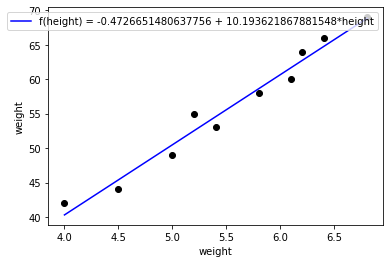

In [8]:
height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1],[6.2],[6.4],[6.8]]
weight=[42, 44 ,49, 55, 53, 58, 60, 64, 66, 69]

print("height weight")

for row in zip(height, weight):
    print(row[0][0],"->",row[1])

plt.scatter(height,weight,color='black')
plt.xlabel("height")
plt.ylabel("weight")

lin_reg = linear_model.LinearRegression()
lin_reg.fit(height, weight)

# Show trained model
print(show_model(lin_reg))

# Plot the model
predicted_values = [lin_reg.coef_ * i + lin_reg.intercept_ for i in height]
# predicted_values = lin_reg.predict(height)
plt.plot(height, predicted_values, 'b')
plt.xlabel('height')
plt.xlabel('weight')
plt.legend(['Dobijeni model'])
plt.legend([show_model(lin_reg)])

plt.show()

### Algoritam gradijentni spust

Ukoliko je data diferencijabilna funkcija $f: R^n \rightarrow R$ njen gradijent se definise kao:
$$
\nabla f = \Big( \frac{\partial{f}}{\partial{x_1}}, \frac{\partial{f}}{\partial{x_2}}, \ ... \ , \frac{\partial{f}}{\partial{x_n}} \Big)
$$

### Gradijentni spust u linearnoj regresiji
U problemu linearne regresije, potrebno je odabrati koeficijente $w_i$ tako da se najbolje objasni
fenomen (pravilnost) koji postoji u podacima. Prirodno je da ako je greska koju nas model pravi
mala, dobijeni model kvalitetan.

Ipak nije tako jednostavno kao sto deluje, jer se modeli mogu
preprilagoditi podacima u nekim situacijama i manifestovari lose ponasanje.
U tim situacijama, greska na podacima nad kojim se model obucava je tipicna vrlo niska (cak i 0),
ali na novim podacima (koje model nije video) visoka. Vise o ovome u kasnijim primerima tokom kursa.


### Funkcija greske
Funkcija greske koja se cesto koristi je srednje-kvadratna greska:
$$
\mathcal{L}(w) = \frac{1}{2N} \sum_{i=1}^{N} (f_w(x^{(i)}) - y_i)
$$
gde je:
- $x^{(i)}$ - i-ti podatak iz skupa podataka (vektor sa n vrednosti)
- $x_k$ - vrednost k-tog atributa nekog podataka $x \in X$
- $y_i$ - tacna vrednost funkcije iz podataka za i-ti podatak
- $f_w(x^{(i)})$ - predikcija nase funkcije linearne regresije

Odnosno:
$$
f_w(x_i) = w_0 + \sum_{i=1}^{n} w_i * x_i
$$


### Gradijenti spust
Kako bi pojednostavili izvodjenje, pretpostavimo da je dostupan jedan atribut, odnosno:
$$
X = \begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
1 & x^{(3)} \\
... \\
1 & x^{(N)} \\
\end{bmatrix}
$$
Kolone jedinica smo dodali radi tehnickih pogodnosti pri zapisu - koristicemo ih za slobodni clan $w_0$.

Usled jednog dostupnog atributa, model koji zelimo da naucimo je:
$$
f_w(x) = w_0 + w_1 \cdot x
$$

A minimizacioni problem je:
$$
\min_w \mathcal{L}(w)
$$
Odnosno, zelimo da odaberemo parametre $w$ tako da greska na podacima koje imamo bude minimalna.

Kako bi izveli gradijenti spust, potreban nam je gradijent funkcije $\mathcal{L}$.

$$
\frac{\partial{\mathcal{L}}}{\partial{w_0}} (w) = \frac{1}{N} \sum_{i=1}^{N} (f_w(x^{(i)}) - y_i) \cdot 1
$$
$$
\frac{\partial{\mathcal{L}}}{\partial{w_1}} (w) = \frac{1}{N} \sum_{i=1}^{N} (f_w(x^{(i)}) - y_i) \cdot x^{(i)}
$$

Odnosno:
$$
\nabla \mathcal{L}(w) = \Big( \frac{1}{N} \sum_{i=1}^{N} (f_w(x^{(i)}) - y_i) \cdot 1, \frac{1}{N} \sum_{i=1}^{N} (f_w(x^{(i)}) - y_i) \cdot x^{(i)} \Big)
$$

Azuriranje koeficijenata koristeci gradijenti spust se potom moze izvrsiti na sledeci nacin:
$$
w_k = w_{k-1} - \alpha \nabla{\mathcal{L}}(w)
$$
gde je:
- $\alpha$ velicina koraka koju algoritam pravi (na primer 0.01)
- $w_k$ - k-ti odabrani vektor $w$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Definisacemo funkciju `loss_function` koja nam izracunava vrednost greske nad skupom
podataka $x$ za trenutne koeficijente $w$.

Prethodno navedene formule se kompaktno mogu zapisati matricno na sledeci nacin:
$$
X = \begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
1 & x^{(3)} \\
... \\
1 & x^{(N)} \\
\end{bmatrix}
$$

$$ 
w =  \begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}
$$

$$
predictions =  X \cdot w = \begin{bmatrix}
w_0 + w_1 \cdot x^{(1)} \\
w_0 + w_1 \cdot x^{(2)} \\
... \\
w_0 + w_1 \cdot x^{(N)}
\end{bmatrix}
$$

$$
diff = predictions - y = \begin{bmatrix}
w_0 + w_1 \cdot x^{(1)} - y_1 \\
w_0 + w_1 \cdot x^{(2)} - y_2 \\
... \\
w_0 + w_1 \cdot x^{(N)} - y_N
\end{bmatrix}
$$

$$
X^T = \begin{bmatrix}
1 & 1 & ... & 1 \\
x^{(1)} & x^{(2)} & ...  & x^{(N)}
\end{bmatrix}
$$


$$
gradient = \frac{1}{N} X^T \cdot diff = \frac{1}{N} \begin{bmatrix}
(w_0 + w_1 \cdot x^{(1)}) \cdot 1 +  (w_0 + w_1 \cdot x^{(2)}) \cdot 1 +  ... + (w_0 + w_1 \cdot x^{(N)}) \cdot 1 \\
(w_0 + w_1 \cdot x^{(1)}) \cdot 1 +  (w_0 + w_1 \cdot x^{(2)}) \cdot 1 +  ... + (w_0 + w_1 \cdot x^{(N)}) \cdot 1
\end{bmatrix}
$$

$$
gradient = \frac{1}{N} X^T \cdot diff = \frac{1}{N} \begin{bmatrix}
\sum_{i=1}^{N} (w_0 + w_1 \cdot x^{(i)}) \cdot 1 \\
\sum_{i=1}^{N} (w_0 + w_1 \cdot x^{(i)}) \cdot x^{(i)} \\
\end{bmatrix}
$$

In [10]:
def loss_function(X, y, w):
    """
    Funkcija za podatke X, ciljnu promenljivu y i koeficijente w,
    izracunava vrednost funkcije greske i gradijent.
    """

    # Uzimamo broj instanci (radi citljivijeg koda)
    N = y.shape[0]

    # Pravimo gradijent - parcijalni izvodi po svakom w_i
    gradient = np.zeros(w.shape[0])

    # Izracunavamo vektor u kojem su predikcije
    # onoga sto nas model govori za prosledjene podatke.
    predictions = X.dot(w)

    # Izracunavamo vektor koji predstavlja razliku nasih predikcija
    # u odnosu na prave vrednosti ciljen promenljive.
    diff = predictions - y

    # Izracunavamo gradijent
    gradient = 1/N * (X.transpose().dot(diff))

    # Izracunavamo funkciju greske
    loss = 1/(2*N) * np.sum(diff**2)

    return loss, gradient

In [11]:
def gradient_descent(X, y, w, num_iters, alpha):
    # Pravimo inicijalni vektor za funkciju greske (imace onoliko mesta
    # koliko iteracija ima gradijentni spust).
    loss_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        # Izracunavamo funkciju greske i gradijente.
        loss, gradient = loss_function(X, y, w)

        # Azuriramo (tehnicki 'biramo nove') koeficijente.
        w = w - alpha * gradient

        # Usput belezimo trenutnu vrednost funkcije greske.
        loss_history[i] = loss

        # Belezimo iteraciju na standardnog izlazu.
        print("Iteration {}/{} Loss = {}".format(i+1, num_iters, loss))

    return w, loss_history

In [12]:
def test_primer_1():
    height = np.array([4, 4.5, 5, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
    weight = np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])
    N = height.shape[0]
    X = np.ones((N, 2))
    X[:, 1] = height
    y = weight.reshape(-1, 1)
    return X, y

In [13]:
def test_primer_2():
    # Uzimamo 50 (podrazumevano je) uniformno raspodeljenih tacaka
    # iz intervala [1, 10]
    height = np.linspace(1, 10)
    N = height.shape[0]

    # Generise podatke sa prave 3x + 2*eps, gde eps (sum) uzimamo
    # iz normalne raspodele N(0, 1).
    weight = height*3 + 2*np.random.normal(size=(1, N))

    # Dodajemo kolonu jedinica iz tehnickih pogodnosti (prva kolona, tj nulta)
    X = np.ones((N, 2))

    # Dodajemo i podatke
    X[:, 1] = height

    # menjamo shape (N,) u (N, 1)
    y = weight.reshape(-1, 1)
    return X, y


In [14]:
def show_model(w):
    return "f_w(x) = %.2f + height*%.2f" % (w[0][0], w[1][0])


X.shape = (50, 2)
y.shape
Iteration 1/40 Loss = 170.6526623006347
Iteration 2/40 Loss = 67.09168510984954
Iteration 3/40 Loss = 27.399695500789658
Iteration 4/40 Loss = 12.186872229371176
Iteration 5/40 Loss = 6.35621719176306
Iteration 6/40 Loss = 4.121480424074801
Iteration 7/40 Loss = 3.264956895415903
Iteration 8/40 Loss = 2.936663346277068
Iteration 9/40 Loss = 2.8108253695057774
Iteration 10/40 Loss = 2.762582900792956
Iteration 11/40 Loss = 2.744080628761372
Iteration 12/40 Loss = 2.736976973558624
Iteration 13/40 Loss = 2.73424212915646
Iteration 14/40 Loss = 2.733181770689088
Iteration 15/40 Loss = 2.732763239905215
Iteration 16/40 Loss = 2.7325907481040987
Iteration 17/40 Loss = 2.732512600569618
Iteration 18/40 Loss = 2.732470656867706
Iteration 19/40 Loss = 2.732442633260219
Iteration 20/40 Loss = 2.7324199888612735
Iteration 21/40 Loss = 2.7323994500299658
Iteration 22/40 Loss = 2.732379761911171
Iteration 23/40 Loss = 2.732360443393531
Iteration 24/40 Loss = 2.73234130992

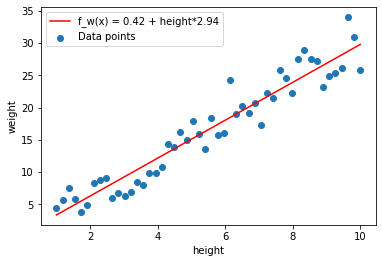

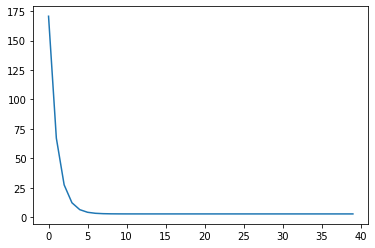

In [15]:

X, y = test_primer_2()

print("X.shape = {}".format(X.shape))
print("y.shape".format(y.shape))

# Broj iteracija koje ce izvrsiti gradijentni spust.
num_iters = 40

# Parametar ucenja - za koliko se pomera gradijentni spust.
alpha = 0.01

# Inicijalni koeficijenti modela.
w = np.zeros((2, 1))

# Pozivamo gradijentni spust koji nam vraca koeficijente w
# kojie predstavljaju koeficijente obucenog modela.
w, loss_history = gradient_descent(X, y, w, num_iters, alpha)
print(show_model(w))

# Izracunavamo predikcije naseg modela, trebace nam za crtanje.
y_predicted = X.dot(w)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_predicted, color='red')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend([show_model(w), 'Data points'])
plt.show()

plt.plot(np.arange(num_iters), loss_history)
plt.show()